In [92]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import SGDClassifier
sns.set_theme()
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [93]:
data = pd.read_csv("NSL-KDD/KDDTrain+.csv")
data.head()

,'duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot',...,'dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate','dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate','class'
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [94]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 42 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   'duration'                     125973 non-null  int64  
 1   'protocol_type'                125973 non-null  object 
 2   'service'                      125973 non-null  object 
 3   'flag'                         125973 non-null  object 
 4   'src_bytes'                    125973 non-null  int64  
 5   'dst_bytes'                    125973 non-null  int64  
 6   'land'                         125973 non-null  int64  
 7   'wrong_fragment'               125973 non-null  int64  
 8   'urgent'                       125973 non-null  int64  
 9   'hot'                          125973 non-null  int64  
 10  'num_failed_logins'            125973 non-null  int64  
 11  'logged_in'                    125973 non-null  int64  
 12  'num_compromised'             

In [95]:
data.columns

Index([''duration'', ''protocol_type'', ''service'', ''flag'', ''src_bytes'',
       ''dst_bytes'', ''land'', ''wrong_fragment'', ''urgent'', ''hot'',
       ''num_failed_logins'', ''logged_in'', ''num_compromised'',
       ''root_shell'', ''su_attempted'', ''num_root'', ''num_file_creations'',
       ''num_shells'', ''num_access_files'', ''num_outbound_cmds'',
       ''is_host_login'', ''is_guest_login'', ''count'', ''srv_count'',
       ''serror_rate'', ''srv_serror_rate'', ''rerror_rate'',
       ''srv_rerror_rate'', ''same_srv_rate'', ''diff_srv_rate'',
       ''srv_diff_host_rate'', ''dst_host_count'', ''dst_host_srv_count'',
       ''dst_host_same_srv_rate'', ''dst_host_diff_srv_rate'',
       ''dst_host_same_src_port_rate'', ''dst_host_srv_diff_host_rate'',
       ''dst_host_serror_rate'', ''dst_host_srv_serror_rate'',
       ''dst_host_rerror_rate'', ''dst_host_srv_rerror_rate'', ''class''],
      dtype='object')

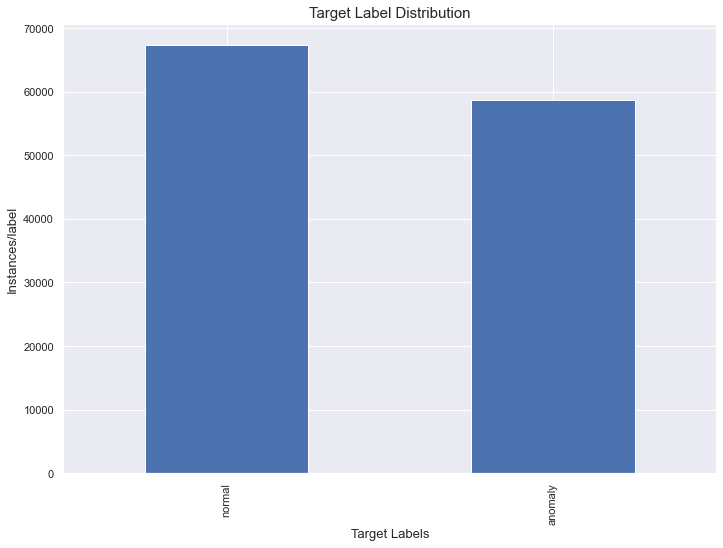

In [96]:
data['\'class\''].value_counts().plot(kind='bar')
plt.title("Target Label Distribution", fontsize=15)
plt.xlabel("Target Labels", fontsize=13)
plt.ylabel("Instances/label", fontsize=13)
plt.show()
# dist

In [97]:
c1 = data['\'class\'']=='normal'
#c2 = data['\'class\'']!='normal'
data['\'class\''] = np.where(c1, 0, 1)

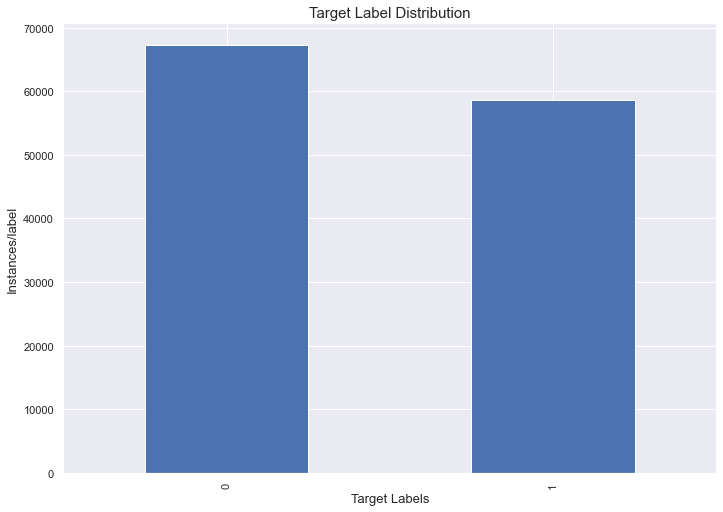

In [98]:
data['\'class\''].value_counts().plot(kind='bar')
plt.title("Target Label Distribution", fontsize=15)
plt.xlabel("Target Labels", fontsize=13)
plt.ylabel("Instances/label", fontsize=13)
plt.show()
# dist

In [99]:
df_cat = data.select_dtypes(exclude=[np.number])
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 3 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   'protocol_type'  125973 non-null  object
 1   'service'        125973 non-null  object
 2   'flag'           125973 non-null  object
dtypes: object(3)
memory usage: 2.9+ MB


In [100]:
df_cat.describe(include='all')

,'protocol_type','service','flag'
count,125973,125973,125973
unique,3,70,11
top,tcp,http,SF
freq,102689,40338,74945


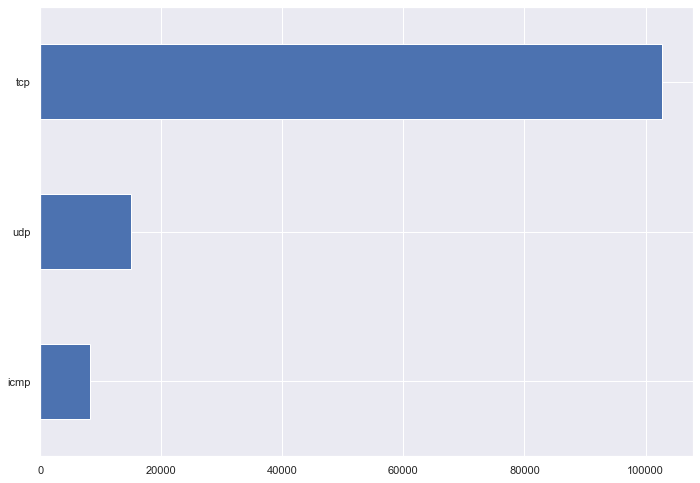

In [101]:
df_cat['\'protocol_type\''].value_counts().head(10).plot(kind='barh').invert_yaxis()

In [102]:
n_features = [3, 5, 3]
for feature, num in zip(df_cat.columns, n_features):
    #print(num)
    if data[feature].nunique()>num:
        where_condition = data[feature].isin(data[feature].value_counts().head(num).index)
        percent = where_condition.sum()/data.shape[0]
        print(f"Feature Name {feature}")
        print(f"Top {num} Features occupy {round(percent*100,2)}% of the data")
        data[feature] = np.where(where_condition,
                               data[feature], "OTHER")

Feature Name 'service'
Top 5 Features occupy 67.8% of the data
Feature Name 'flag'
Top 3 Features occupy 96.08% of the data


In [103]:
data.describe(exclude=[np.number])

,'protocol_type','service','flag'
count,125973,125973,125973
unique,3,6,4
top,tcp,OTHER,SF
freq,102689,40566,74945


In [104]:
for col in data.columns:
    #print(data[col])
    new_name = col.split('\'')[1]
    data.rename(columns={col: new_name}, inplace=True, errors='raise')

In [105]:
data.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'class'],
      dtype='object')

In [145]:
def save_data(df, des=''):
    path = r"NSL-KDD\preprocessing"
    if not os.listdir(path):
        version = "v1"
    else:
        final = os.listdir(path)[-1]
        version = f"v{int(final[-5])+1}"
    #print(os.listdir(path))
    file = os.path.join(path, f"{des}_{version}")
    file += ".csv"
    #data = np.array(df)
    df.to_csv(file, index=False)
    print(f"Version {version} Data is Saved Successfully in Path: {file}")

In [146]:
save_data(data, 'preprocessing')

Version v3 Data is Saved Successfully in Path: NSL-KDD\preprocessing\preprocessing_v3.csv


# One Hot Encoding

In [123]:
X_train = data.drop(columns=['class'], axis=1)
y_train = data['class']

In [124]:
old_features = X_train.columns

In [125]:
len(old_features)

41

In [126]:
X_train.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate'],
      dtype='object')

In [127]:
transformers = [('encoder', OneHotEncoder(sparse=False), [1,2,3])]
ct = ColumnTransformer(transformers=transformers, remainder='passthrough')

In [128]:
X_train.shape

(125973, 41)

In [129]:
X_train = np.array(ct.fit_transform(X_train))
X_train.shape

(125973, 51)

In [130]:
new_features = [f for f in old_features if f not in ['flag', 'service', 'protocol_type']]
len(new_features)

38

In [131]:
for label in list(data['flag'].value_counts().index):
    new_features.insert(0, f"flag={label}")
    
for label in list(data['service'].value_counts().index):
    new_features.insert(0, f"service={label}")
    
for label in list(data['protocol_type'].value_counts().index):
    new_features.insert(0, f"protocol_type={label}")
    
len(new_features)

51

In [132]:
new_features

['protocol_type=icmp',
 'protocol_type=udp',
 'protocol_type=tcp',
 'service=ftp_data',
 'service=smtp',
 'service=domain_u',
 'service=private',
 'service=http',
 'service=OTHER',
 'flag=OTHER',
 'flag=REJ',
 'flag=S0',
 'flag=SF',
 'duration',
 'src_bytes',
 'dst_bytes',
 'land',
 'wrong_fragment',
 'urgent',
 'hot',
 'num_failed_logins',
 'logged_in',
 'num_compromised',
 'root_shell',
 'su_attempted',
 'num_root',
 'num_file_creations',
 'num_shells',
 'num_access_files',
 'num_outbound_cmds',
 'is_host_login',
 'is_guest_login',
 'count',
 'srv_count',
 'serror_rate',
 'srv_serror_rate',
 'rerror_rate',
 'srv_rerror_rate',
 'same_srv_rate',
 'diff_srv_rate',
 'srv_diff_host_rate',
 'dst_host_count',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate',
 'dst_host_rerror_rate',
 'dst_host_srv_rerror_rate']

In [133]:
df_one_hot = pd.DataFrame(X_train, columns=new_features)
df_one_hot.iloc[0].values

array([0.00e+00, 1.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 1.00e+00,
       0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
       1.00e+00, 0.00e+00, 4.91e+02, 0.00e+00, 0.00e+00, 0.00e+00,
       0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
       0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
       0.00e+00, 0.00e+00, 2.00e+00, 2.00e+00, 0.00e+00, 0.00e+00,
       0.00e+00, 0.00e+00, 1.00e+00, 0.00e+00, 0.00e+00, 1.50e+02,
       2.50e+01, 1.70e-01, 3.00e-02, 1.70e-01, 0.00e+00, 0.00e+00,
       0.00e+00, 5.00e-02, 0.00e+00])

In [134]:
X_train[0]

array([0.00e+00, 1.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 1.00e+00,
       0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
       1.00e+00, 0.00e+00, 4.91e+02, 0.00e+00, 0.00e+00, 0.00e+00,
       0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
       0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
       0.00e+00, 0.00e+00, 2.00e+00, 2.00e+00, 0.00e+00, 0.00e+00,
       0.00e+00, 0.00e+00, 1.00e+00, 0.00e+00, 0.00e+00, 1.50e+02,
       2.50e+01, 1.70e-01, 3.00e-02, 1.70e-01, 0.00e+00, 0.00e+00,
       0.00e+00, 5.00e-02, 0.00e+00])

In [135]:
save_data(df_one_hot,des='one_hot')

Version v2 Data is Saved Successfully in Path: NSL-KDD\preprocessing\one_hot_v2.csv


# Train a Base Line Model with all Features

In [162]:
def define_models():
    RS = 32
    estimators = {
        "DecisionTree": DecisionTreeClassifier(random_state=RS),
        "RandomForest" : RandomForestClassifier(random_state=RS, n_jobs=-1),
        "ExtraTrees": ExtraTreesClassifier(random_state=RS,n_jobs=-1),
        "GradientBoosting": GradientBoostingClassifier(random_state=RS),
        "XGBoost": XGBClassifier(random_state=RS, use_label_encoder=False,
                                 n_jobs=-1),
        "AdaBoost": AdaBoostClassifier(random_state=RS),
        "SVC": Pipeline([('scaler', StandardScaler()),
                         ('svc', LinearSVC(random_state=RS))]),
        "LogisticRegression": Pipeline([('scaler', StandardScaler()),
                                        ('lg', LogisticRegression(random_state=RS))]),
        "Lasso": Pipeline([('scaler', StandardScaler()),
                                        ('lasso', SGDClassifier(random_state=RS, penalty='l2'))]),
        "Ridge": Pipeline([('scaler', StandardScaler()),
                                        ('ridge', SGDClassifier(random_state=RS, penalty='l1'))]),
        "ElasticNet": Pipeline([('scaler', StandardScaler()),
                                        ('ElasticNet', SGDClassifier(random_state=RS, penalty="elasticnet"))])
        
    }
    return estimators

In [163]:
def get_avg_scores(scores, scoring_list):
    result = dict()
    val = ['train_', 'test_']
    for score in scoring_list:
        for v in val:
            score_name = v + score
            result[score_name] = np.round(np.mean(scores[score_name], axis=0)*100, 2)    
    return result

In [164]:
def run_cross_validate(X_train, y_train):
    
    estimators = define_models()
    results = dict()
    for name, model in estimators.items():
        scoring = ['accuracy', 'f1', 'roc_auc', 'precision', 'recall']
        scores = cross_validate(model,
                               X_train, y_train,
                               scoring = scoring,
                               cv=5,
                               n_jobs=-1,
                               verbose=3,
                               return_train_score=True,
                               )
        results[name] = get_avg_scores(scores, scoring)
        
    result_df = []
    for model_name, metric_dic in results.items():
        r = [model_name, X_train.shape[1]]
        for metric_name, metric_result in metric_dic.items():
            r.append(metric_result)
        result_df.append(r)

    cols_names = ['Model', 'Number OF Features','Train_acc', 'Test_acc', 
                  'Train_F1', 'Test_F1',
                  'Train_roc_auc', 'Test_roc_auc',
                  'Train_precision', 'Test_precision', 'Train_Recall', 'Test_Recall']
    
    profile = pd.DataFrame(data=result_df, 
                       columns=cols_names)
    profile.index = profile['Model']
    profile.drop(columns=['Model'], axis=1, inplace=True)
    return profile

In [139]:
profile = run_cross_validate(X_train, y_train)
profile

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    9.0s remaining:   13.6s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    9.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   22.3s remaining:   33.5s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   27.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   33.2s remaining:   49.9s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   33.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  1.5min remaining:  2.2min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.5min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_

,Number OF Features,Train_acc,Test_acc,Train_F1,Test_F1,Train_roc_auc,Test_roc_auc,Train_precision,Test_precision,Train_Recall,Test_Recall
Model,,,,,,,,,,,
DecisionTree,51,100.00,99.81,100.00,99.80,100.00,99.81,100.00,99.79,99.99,99.80
RandomForest,51,100.00,99.90,100.00,99.89,100.00,100.00,100.00,99.94,99.99,99.83
ExtraTrees,51,100.00,99.87,100.00,99.86,100.00,99.99,100.00,99.91,99.99,99.81
GradientBoosting,51,99.59,99.56,99.56,99.53,99.98,99.97,99.57,99.56,99.55,99.50
XGBoost,51,99.99,99.92,99.99,99.91,100.00,100.00,99.99,99.93,99.99,99.90
AdaBoost,51,99.00,98.97,98.93,98.89,99.94,99.94,99.21,99.15,98.64,98.63
SVC,51,96.94,96.91,96.69,96.66,99.49,99.49,97.42,97.40,95.97,95.93
LogisticRegression,51,96.91,96.89,96.65,96.63,99.54,99.53,97.37,97.35,95.95,95.93
Lasso,51,97.37,97.36,97.16,97.14,99.36,99.35,97.73,97.78,96.60,96.52


In [140]:
profile.style.background_gradient(cmap='coolwarm')

,Number OF Features,Train_acc,Test_acc,Train_F1,Test_F1,Train_roc_auc,Test_roc_auc,Train_precision,Test_precision,Train_Recall,Test_Recall
Model,,,,,,,,,,,
DecisionTree,51,100.000000,99.810000,100.000000,99.800000,100.000000,99.810000,100.000000,99.790000,99.990000,99.800000
RandomForest,51,100.000000,99.900000,100.000000,99.890000,100.000000,100.000000,100.000000,99.940000,99.990000,99.830000
ExtraTrees,51,100.000000,99.870000,100.000000,99.860000,100.000000,99.990000,100.000000,99.910000,99.990000,99.810000
GradientBoosting,51,99.590000,99.560000,99.560000,99.530000,99.980000,99.970000,99.570000,99.560000,99.550000,99.500000
XGBoost,51,99.990000,99.920000,99.990000,99.910000,100.000000,100.000000,99.990000,99.930000,99.990000,99.900000
AdaBoost,51,99.000000,98.970000,98.930000,98.890000,99.940000,99.940000,99.210000,99.150000,98.640000,98.630000
SVC,51,96.940000,96.910000,96.690000,96.660000,99.490000,99.490000,97.420000,97.400000,95.970000,95.930000
LogisticRegression,51,96.910000,96.890000,96.650000,96.630000,99.540000,99.530000,97.370000,97.350000,95.950000,95.930000
Lasso,51,97.370000,97.360000,97.160000,97.140000,99.360000,99.350000,97.730000,97.780000,96.600000,96.520000


In [141]:
from sklearn.ensemble import StackingClassifier
from sklearn.preprocessing import StandardScaler

In [142]:
X_train_scaled = StandardScaler().fit_transform(X_train)

In [143]:
def define_models():
    RS = 32
    estimators_ = [('extra', ExtraTreesClassifier()),
                   ('XGB', XGBClassifier()),
                   ('RF', RandomForestClassifier())]
    estimators = {
        "Stacking Classifier":StackingClassifier(estimators=estimators_,
                                                 cv=5, n_jobs=-1),
    }
    return estimators

In [144]:
profile = run_cross_validate(X_train_scaled, y_train)
profile

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  7.1min remaining: 10.7min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  7.2min finished


,Number OF Features,Train_acc,Test_acc,Train_F1,Test_F1,Train_roc_auc,Test_roc_auc,Train_precision,Test_precision,Train_Recall,Test_Recall
Model,,,,,,,,,,,
Stacking Classifier,51,100.0,99.92,100.0,99.91,100.0,100.0,99.99,99.93,100.0,99.9


# Feature Extraction Using Orange Output Rank

In [147]:
X_train = pd.read_csv("NSL-KDD/preprocessing/one_hot_v2.csv")
X_train.head()

,protocol_type=icmp,protocol_type=udp,protocol_type=tcp,service=ftp_data,service=smtp,service=domain_u,service=private,service=http,service=OTHER,flag=OTHER,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,150.0,25.0,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00
1,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,255.0,1.0,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,255.0,26.0,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00
3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,30.0,255.0,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01
4,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,255.0,255.0,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [148]:
X_train.columns

Index(['protocol_type=icmp', 'protocol_type=udp', 'protocol_type=tcp',
       'service=ftp_data', 'service=smtp', 'service=domain_u',
       'service=private', 'service=http', 'service=OTHER', 'flag=OTHER',
       'flag=REJ', 'flag=S0', 'flag=SF', 'duration', 'src_bytes', 'dst_bytes',
       'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins',
       'logged_in', 'num_compromised', 'root_shell', 'su_attempted',
       'num_root', 'num_file_creations', 'num_shells', 'num_access_files',
       'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count',
       'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate',
       'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate',
       'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
       'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
       'dst_host_serror_rate', 'dst_host_srv_serror_rate',
       'dst_host_rerror_rate', 'dst_host_s

In [149]:
rank = pd.read_csv("NSL-KDD/rank/Feature Scores.csv")
rank = rank.iloc[2:,:]
rank.index = rank.Feature
rank = rank.drop(columns=["Feature"], axis=1).astype('float64')
rank.head(10)

,Info. gain,Gain ratio,χ²,ReliefF
Feature,,,,
duration,0.021574,0.040974,4201.932814,0.001862
protocol_type=icmp,0.031045,0.088672,4728.708183,0.000000
protocol_type=tcp,0.002048,0.002965,65.716909,0.000000
protocol_type=udp,0.037170,0.070595,5234.823536,0.000000
service=OTHER,0.183564,0.202483,20604.605387,0.136000
service=domain_u,0.067521,0.181239,7839.359702,0.040000
service=ftp_data,0.006422,0.021053,1015.858001,0.008000
service=http,0.265851,0.293884,27077.344098,0.010000
service=private,0.169713,0.254982,21058.062349,0.186000


In [151]:
for col in X_train.columns:
    print(col in rank.index)

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


In [152]:
def cross_validate_with_FS(X_train, y_train, scoring_method):
    min_score = rank[scoring_method].quantile(0.10)
    max_score = rank[scoring_method].quantile(0.90)
    ths = np.round(np.linspace(min_score, max_score, num=10), 10)
    first = True
    for th in ths:
        print(f"Cross Validate On Threshold {th}")
        new_fs = rank.index[rank[scoring_method] >= th]
        X_train_ = X_train[new_fs]
        if first:
            S = f"{scoring_method} TH= {th}"
            profile = run_cross_validate(X_train_, y_train)
            profile['Scoring Method'] = S
            profile.index = profile.index + ' ' + scoring_method +' '+ str(len(new_fs))
            first = False
        else:
            p = run_cross_validate(X_train_, y_train)
            S = f"{scoring_method} TH= {th}"
            p['Scoring Method'] = S
            p.index = p.index + ' ' + scoring_method +' '+ str(len(new_fs))
            profile = profile.append(p)
        #profile['Scoring Method'] = scoring_method
    return profile

In [153]:
dfs = {}
for s_m in rank.columns:
    p = cross_validate_with_FS(X_train, y_train, s_m)
    dfs[s_m] = p

Cross Validate On Threshold 0.0001357121


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  5.1min remaining:  7.7min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  5.1min finished


Cross Validate On Threshold 0.0470886997


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  4.2min remaining:  6.3min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  4.2min finished


Cross Validate On Threshold 0.0940416872


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  3.7min remaining:  5.5min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  3.7min finished


Cross Validate On Threshold 0.1409946748


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  3.5min remaining:  5.3min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  3.6min finished


Cross Validate On Threshold 0.1879476623


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  3.8min remaining:  5.8min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  3.9min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Cross Validate On Threshold 0.2349006499


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  3.7min remaining:  5.5min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  3.7min finished


Cross Validate On Threshold 0.2818536374


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  3.2min remaining:  4.8min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  3.2min finished


Cross Validate On Threshold 0.328806625


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  3.0min remaining:  4.6min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  3.0min finished


Cross Validate On Threshold 0.3757596125


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  2.8min remaining:  4.2min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  2.8min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Cross Validate On Threshold 0.4227126001


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  2.3min remaining:  3.4min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  2.3min finished


Cross Validate On Threshold 0.0139738649


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  5.2min remaining:  7.8min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  5.3min finished


Cross Validate On Threshold 0.0513116873


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  4.7min remaining:  7.1min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  4.8min finished


Cross Validate On Threshold 0.0886495096


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  4.0min remaining:  6.0min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  4.0min finished


Cross Validate On Threshold 0.1259873319


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  3.5min remaining:  5.3min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  3.6min finished


Cross Validate On Threshold 0.1633251542


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  3.2min remaining:  4.8min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  3.2min finished


Cross Validate On Threshold 0.2006629766


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  3.0min remaining:  4.6min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  3.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Cross Validate On Threshold 0.2380007989


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  2.8min remaining:  4.2min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  2.8min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Cross Validate On Threshold 0.2753386212


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  3.1min remaining:  4.6min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  3.1min finished


Cross Validate On Threshold 0.3126764436


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  3.0min remaining:  4.6min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  3.0min finished


Cross Validate On Threshold 0.3500142659


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  1.4min remaining:  2.1min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.4min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Cross Validate On Threshold 6.5123951153


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  5.3min remaining:  8.0min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  5.4min finished


Cross Validate On Threshold 7124.6526655174


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  4.8min remaining:  7.2min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  4.8min finished


Cross Validate On Threshold 14242.7929359194


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  4.1min remaining:  6.1min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  4.1min finished


Cross Validate On Threshold 21360.9332063215


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  3.4min remaining:  5.1min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  3.4min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Cross Validate On Threshold 28479.0734767236


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  3.1min remaining:  4.6min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  3.1min finished


Cross Validate On Threshold 35597.2137471256


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  3.1min remaining:  4.6min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  3.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Cross Validate On Threshold 42715.3540175277


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  3.0min remaining:  4.5min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  3.0min finished


Cross Validate On Threshold 49833.4942879298


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  2.6min remaining:  4.0min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  2.7min finished


Cross Validate On Threshold 56951.6345583318


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  2.6min remaining:  3.9min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  2.6min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Cross Validate On Threshold 64069.7748287339


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  2.6min remaining:  3.9min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  2.6min finished


Cross Validate On Threshold 0.0


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  6.2min remaining:  9.3min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  6.3min finished


Cross Validate On Threshold 0.0174659709


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  4.1min remaining:  6.2min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  4.1min finished


Cross Validate On Threshold 0.0349319417


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  3.6min remaining:  5.4min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  3.7min finished


Cross Validate On Threshold 0.0523979126


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  3.5min remaining:  5.3min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  3.5min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Cross Validate On Threshold 0.0698638835


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  3.2min remaining:  4.8min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  3.2min finished


Cross Validate On Threshold 0.0873298543


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  3.1min remaining:  4.7min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  3.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Cross Validate On Threshold 0.1047958252


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  2.8min remaining:  4.2min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  2.8min finished


Cross Validate On Threshold 0.122261796


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  2.5min remaining:  3.8min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  2.5min finished


Cross Validate On Threshold 0.1397277669


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  2.5min remaining:  3.8min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  2.5min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Cross Validate On Threshold 0.1571937378


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  2.3min remaining:  3.4min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  2.3min finished


In [167]:
dfs.keys()

dict_keys(['Info. gain', 'Gain ratio', 'χ²', 'ReliefF'])

In [168]:
dfs['Gain ratio']

,Number OF Features,Train_acc,Test_acc,Train_F1,Test_F1,Train_roc_auc,Test_roc_auc,Train_precision,Test_precision,Train_Recall,Test_Recall,Scoring Method
Model,,,,,,,,,,,,
Stacking Classifier Gain ratio 46,46,100.00,99.92,100.00,99.92,100.00,100.00,99.99,99.94,100.00,99.90,Gain ratio TH= 0.0139738649
Stacking Classifier Gain ratio 36,36,100.00,99.89,100.00,99.88,100.00,100.00,99.99,99.91,100.00,99.85,Gain ratio TH= 0.0513116873
Stacking Classifier Gain ratio 26,26,99.99,99.88,99.99,99.87,100.00,100.00,99.99,99.90,100.00,99.84,Gain ratio TH= 0.0886495096
Stacking Classifier Gain ratio 21,21,99.99,99.87,99.99,99.86,100.00,100.00,99.99,99.89,100.00,99.83,Gain ratio TH= 0.1259873319
Stacking Classifier Gain ratio 17,17,99.99,99.85,99.99,99.84,100.00,100.00,99.98,99.86,100.00,99.81,Gain ratio TH= 0.1633251542
Stacking Classifier Gain ratio 15,15,99.93,99.81,99.92,99.80,100.00,99.99,99.90,99.81,99.94,99.78,Gain ratio TH= 0.2006629766
Stacking Classifier Gain ratio 13,13,99.83,99.73,99.82,99.71,100.00,99.99,99.73,99.67,99.92,99.75,Gain ratio TH= 0.2380007989
Stacking Classifier Gain ratio 11,11,96.65,96.52,96.43,96.29,99.55,99.49,95.52,95.40,97.37,97.20,Gain ratio TH= 0.2753386212
Stacking Classifier Gain ratio 9,9,95.16,95.05,94.78,94.66,99.31,99.23,95.09,95.00,94.48,94.33,Gain ratio TH= 0.3126764436


In [170]:
dfs['χ²']

,Number OF Features,Train_acc,Test_acc,Train_F1,Test_F1,Train_roc_auc,Test_roc_auc,Train_precision,Test_precision,Train_Recall,Test_Recall,Scoring Method
Model,,,,,,,,,,,,
Stacking Classifier χ² 46,46,100.00,99.92,100.00,99.91,100.00,100.00,99.99,99.94,100.00,99.89,χ² TH= 6.5123951153
Stacking Classifier χ² 26,26,100.00,99.88,100.00,99.87,100.00,100.00,99.99,99.90,100.00,99.84,χ² TH= 7124.6526655174
Stacking Classifier χ² 21,21,99.99,99.87,99.99,99.86,100.00,100.00,99.99,99.89,100.00,99.82,χ² TH= 14242.7929359194
Stacking Classifier χ² 16,16,99.98,99.84,99.98,99.83,100.00,100.00,99.99,99.88,99.98,99.78,χ² TH= 21360.9332063215
Stacking Classifier χ² 14,14,99.98,99.83,99.98,99.81,100.00,100.00,99.98,99.85,99.98,99.77,χ² TH= 28479.0734767236
Stacking Classifier χ² 12,12,99.98,99.83,99.98,99.81,100.00,99.99,99.98,99.86,99.98,99.77,χ² TH= 35597.2137471256
Stacking Classifier χ² 9,9,99.96,99.79,99.96,99.78,100.00,99.99,99.95,99.83,99.96,99.73,χ² TH= 42715.3540175277
Stacking Classifier χ² 8,8,99.88,99.75,99.87,99.74,100.00,99.99,99.86,99.78,99.88,99.69,χ² TH= 49833.4942879298
Stacking Classifier χ² 7,7,98.82,98.70,98.71,98.59,99.95,99.92,99.82,99.74,97.63,97.46,χ² TH= 56951.6345583318


In [171]:
dfs['ReliefF']

,Number OF Features,Train_acc,Test_acc,Train_F1,Test_F1,Train_roc_auc,Test_roc_auc,Train_precision,Test_precision,Train_Recall,Test_Recall,Scoring Method
Model,,,,,,,,,,,,
Stacking Classifier ReliefF 50,50,100.00,99.91,100.00,99.91,100.00,100.00,99.99,99.92,100.00,99.89,ReliefF TH= 0.0
Stacking Classifier ReliefF 26,26,99.61,99.41,99.58,99.36,99.99,99.97,99.48,99.28,99.69,99.45,ReliefF TH= 0.0174659709
Stacking Classifier ReliefF 20,20,99.54,99.27,99.50,99.21,99.99,99.98,99.39,99.17,99.62,99.26,ReliefF TH= 0.0349319417
Stacking Classifier ReliefF 16,16,99.48,99.20,99.44,99.14,99.99,99.97,99.33,99.08,99.56,99.20,ReliefF TH= 0.0523979126
Stacking Classifier ReliefF 15,15,99.48,99.21,99.44,99.15,99.99,99.97,99.34,99.10,99.54,99.21,ReliefF TH= 0.0698638835
Stacking Classifier ReliefF 14,14,99.44,99.16,99.40,99.10,99.99,99.97,99.29,99.05,99.51,99.14,ReliefF TH= 0.0873298543
Stacking Classifier ReliefF 9,9,97.33,96.82,97.14,96.59,99.76,99.62,96.89,96.44,97.38,96.73,ReliefF TH= 0.1047958252
Stacking Classifier ReliefF 8,8,97.34,96.80,97.15,96.57,99.76,99.61,96.91,96.42,97.38,96.72,ReliefF TH= 0.122261796
Stacking Classifier ReliefF 7,7,97.12,96.65,96.91,96.41,99.71,99.56,96.73,96.28,97.09,96.54,ReliefF TH= 0.1397277669


In [160]:
dfs['Info. gain']

,Number OF Features,Train_acc,Test_acc,Train_F1,Test_F1,Train_roc_auc,Test_roc_auc,Train_precision,Test_precision,Train_Recall,Test_Recall,Scoring Method
Model,,,,,,,,,,,,
Stacking Classifier Info. gain 46,46,100.00,99.92,100.00,99.91,100.0,100.00,99.99,99.93,100.00,99.89,Info. gain TH= 0.0001357121
Stacking Classifier Info. gain 26,26,100.00,99.87,100.00,99.86,100.0,100.00,99.99,99.90,100.00,99.83,Info. gain TH= 0.0470886997
Stacking Classifier Info. gain 22,22,99.99,99.87,99.99,99.86,100.0,100.00,99.99,99.89,100.00,99.83,Info. gain TH= 0.0940416872
Stacking Classifier Info. gain 21,21,99.99,99.87,99.99,99.86,100.0,100.00,99.99,99.88,100.00,99.84,Info. gain TH= 0.1409946748
Stacking Classifier Info. gain 17,17,99.99,99.86,99.99,99.85,100.0,100.00,99.99,99.90,100.00,99.79,Info. gain TH= 0.1879476623
Stacking Classifier Info. gain 16,16,99.98,99.84,99.98,99.83,100.0,100.00,99.99,99.88,99.98,99.78,Info. gain TH= 0.2349006499
Stacking Classifier Info. gain 15,15,99.98,99.84,99.98,99.83,100.0,100.00,99.98,99.87,99.98,99.78,Info. gain TH= 0.2818536374
Stacking Classifier Info. gain 13,13,99.97,99.82,99.97,99.80,100.0,99.99,99.97,99.84,99.97,99.76,Info. gain TH= 0.328806625
Stacking Classifier Info. gain 10,10,99.90,99.78,99.90,99.77,100.0,99.99,99.88,99.80,99.91,99.73,Info. gain TH= 0.3757596125


In [157]:
d = pd.DataFrame()
for df in dfs.values():
     d = d.append(df.sort_values(['Test_acc'],axis=0, ascending=False).head(6))

In [158]:
result = d.sort_values(['Test_acc', 'Number OF Features'],axis=0, ascending=False)
result

,Number OF Features,Train_acc,Test_acc,Train_F1,Test_F1,Train_roc_auc,Test_roc_auc,Train_precision,Test_precision,Train_Recall,Test_Recall,Scoring Method
Model,,,,,,,,,,,,
Stacking Classifier Info. gain 46,46,100.00,99.92,100.00,99.91,100.00,100.00,99.99,99.93,100.00,99.89,Info. gain TH= 0.0001357121
Stacking Classifier Gain ratio 46,46,100.00,99.92,100.00,99.92,100.00,100.00,99.99,99.94,100.00,99.90,Gain ratio TH= 0.0139738649
Stacking Classifier χ² 46,46,100.00,99.92,100.00,99.91,100.00,100.00,99.99,99.94,100.00,99.89,χ² TH= 6.5123951153
Stacking Classifier ReliefF 50,50,100.00,99.91,100.00,99.91,100.00,100.00,99.99,99.92,100.00,99.89,ReliefF TH= 0.0
Stacking Classifier Gain ratio 36,36,100.00,99.89,100.00,99.88,100.00,100.00,99.99,99.91,100.00,99.85,Gain ratio TH= 0.0513116873
Stacking Classifier Gain ratio 26,26,99.99,99.88,99.99,99.87,100.00,100.00,99.99,99.90,100.00,99.84,Gain ratio TH= 0.0886495096
Stacking Classifier χ² 26,26,100.00,99.88,100.00,99.87,100.00,100.00,99.99,99.90,100.00,99.84,χ² TH= 7124.6526655174
Stacking Classifier Info. gain 26,26,100.00,99.87,100.00,99.86,100.00,100.00,99.99,99.90,100.00,99.83,Info. gain TH= 0.0470886997
Stacking Classifier Info. gain 22,22,99.99,99.87,99.99,99.86,100.00,100.00,99.99,99.89,100.00,99.83,Info. gain TH= 0.0940416872


In [172]:
def define_models():
    RS = 32
    estimators = {
        "DecisionTree": DecisionTreeClassifier(random_state=RS),
        "RandomForest" : RandomForestClassifier(random_state=RS, n_jobs=-1),
        "ExtraTrees": ExtraTreesClassifier(random_state=RS,n_jobs=-1),
        "GradientBoosting": GradientBoostingClassifier(random_state=RS),
        "XGBoost": XGBClassifier(random_state=RS, use_label_encoder=False,
                                 n_jobs=-1),
        "AdaBoost": AdaBoostClassifier(random_state=RS),
        "SVC": Pipeline([('scaler', StandardScaler()),
                         ('svc', LinearSVC(random_state=RS))]),
        "LogisticRegression": Pipeline([('scaler', StandardScaler()),
                                        ('lg', LogisticRegression(random_state=RS))]),
        "Lasso": Pipeline([('scaler', StandardScaler()),
                                        ('lasso', SGDClassifier(random_state=RS, penalty='l2'))]),
        "Ridge": Pipeline([('scaler', StandardScaler()),
                                        ('ridge', SGDClassifier(random_state=RS, penalty='l1'))]),
        "ElasticNet": Pipeline([('scaler', StandardScaler()),
                                        ('ElasticNet', SGDClassifier(random_state=RS, penalty="elasticnet"))])
        
    }
    return estimators

In [173]:
dfs = {}
for s_m in rank.columns:
    p = cross_validate_with_FS(X_train, y_train, s_m)
    dfs[s_m] = p

Cross Validate On Threshold 0.0001357121


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    8.2s remaining:   12.4s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    8.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   13.9s remaining:   20.9s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   21.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   21.5s remaining:   32.3s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   22.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   45.9s remaining:  1.1min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   46.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_

Cross Validate On Threshold 0.0470886997


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    1.2s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   17.5s remaining:   26.3s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   18.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   17.5s remaining:   26.3s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   18.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   32.8s remaining:   49.2s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   33.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_

Cross Validate On Threshold 0.0940416872


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    1.0s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   16.3s remaining:   24.6s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   16.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   15.2s remaining:   22.9s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   16.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   35.7s remaining:   53.6s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   35.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_

Cross Validate On Threshold 0.1409946748


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    1.2s remaining:    1.9s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   17.1s remaining:   25.6s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   17.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   17.8s remaining:   26.8s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   18.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   38.2s remaining:   57.3s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   38.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_

Cross Validate On Threshold 0.1879476623


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    1.5s remaining:    2.3s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   19.5s remaining:   29.3s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   20.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   17.0s remaining:   25.5s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   17.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   25.5s remaining:   38.3s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   25.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_

Cross Validate On Threshold 0.2349006499


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.9s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   18.3s remaining:   27.6s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   18.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   19.1s remaining:   28.7s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   19.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   33.1s remaining:   49.7s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   33.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_

Cross Validate On Threshold 0.2818536374


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.9s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   14.7s remaining:   22.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   15.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   17.2s remaining:   25.9s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   18.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   26.1s remaining:   39.2s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   26.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   15.7s remaining:   23.6s
[Parall

Cross Validate On Threshold 0.328806625


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.7s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   15.5s remaining:   23.3s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   16.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   17.4s remaining:   26.2s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   17.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   22.4s remaining:   33.6s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   22.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_

Cross Validate On Threshold 0.3757596125


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.6s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   15.0s remaining:   22.6s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   15.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   14.2s remaining:   21.4s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   14.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   16.2s remaining:   24.3s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   16.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_

Cross Validate On Threshold 0.4227126001


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.8s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   15.1s remaining:   22.7s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   15.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   12.2s remaining:   18.4s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   12.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   12.6s remaining:   18.9s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   12.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_

Cross Validate On Threshold 0.0139738649


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    1.8s remaining:    2.7s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   20.7s remaining:   31.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   21.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   23.3s remaining:   35.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   24.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   49.4s remaining:  1.2min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   49.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_

Cross Validate On Threshold 0.0513116873


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    1.4s remaining:    2.2s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   20.9s remaining:   31.4s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   21.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   21.6s remaining:   32.5s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   22.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   46.1s remaining:  1.2min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   46.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_

Cross Validate On Threshold 0.0886495096


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    1.2s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   19.4s remaining:   29.2s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   20.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   18.9s remaining:   28.4s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   19.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   37.0s remaining:   55.6s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   37.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_

Cross Validate On Threshold 0.1259873319


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    1.1s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   18.5s remaining:   27.9s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   18.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   19.2s remaining:   28.9s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   20.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   33.2s remaining:   49.8s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   33.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_

Cross Validate On Threshold 0.1633251542


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.8s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   16.3s remaining:   24.5s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   17.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   17.8s remaining:   26.8s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   18.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   25.7s remaining:   38.6s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   25.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_

Cross Validate On Threshold 0.2006629766


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.8s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   14.7s remaining:   22.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   15.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   16.5s remaining:   24.9s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   17.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   22.4s remaining:   33.6s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   22.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_

Cross Validate On Threshold 0.2380007989


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.7s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   14.4s remaining:   21.7s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   14.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   16.8s remaining:   25.3s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   17.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   20.2s remaining:   30.3s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   20.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_

Cross Validate On Threshold 0.2753386212


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.6s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   15.9s remaining:   23.9s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   16.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   16.7s remaining:   25.2s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   17.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   16.7s remaining:   25.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   17.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_

Cross Validate On Threshold 0.3126764436


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.7s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   16.0s remaining:   24.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   16.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   15.4s remaining:   23.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   16.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   14.6s remaining:   21.9s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   14.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_

Cross Validate On Threshold 0.3500142659


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.3s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    8.0s remaining:   12.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    8.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    7.9s remaining:   12.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    8.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    7.3s remaining:   11.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    7.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    7.8s remaining:   11.7s
[Parall

Cross Validate On Threshold 6.5123951153


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    2.1s remaining:    3.2s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   21.5s remaining:   32.3s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   22.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   24.7s remaining:   37.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   25.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   51.9s remaining:  1.3min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   52.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_

Cross Validate On Threshold 7124.6526655174


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    1.3s remaining:    2.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   19.4s remaining:   29.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   20.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   21.7s remaining:   32.6s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   22.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   37.6s remaining:   56.5s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   37.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_

Cross Validate On Threshold 14242.7929359194


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    1.1s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   17.7s remaining:   26.6s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   18.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   18.0s remaining:   27.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   18.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   32.1s remaining:   48.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   32.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_

Cross Validate On Threshold 21360.9332063215


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.9s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   17.5s remaining:   26.2s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   17.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   18.1s remaining:   27.2s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   18.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   27.6s remaining:   41.4s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   27.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_

Cross Validate On Threshold 28479.0734767236


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.9s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   15.4s remaining:   23.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   16.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   17.1s remaining:   25.7s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   18.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   23.6s remaining:   35.5s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   23.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_

Cross Validate On Threshold 35597.2137471256


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.7s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   15.6s remaining:   23.4s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   16.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   17.6s remaining:   26.4s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   18.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   21.9s remaining:   32.9s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   22.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_

Cross Validate On Threshold 42715.3540175277


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.6s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   15.3s remaining:   22.9s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   15.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   17.0s remaining:   25.6s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   18.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   18.2s remaining:   27.3s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   18.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   12.1s remaining:   18.2s
[Parall

Cross Validate On Threshold 49833.4942879298


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.6s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   13.5s remaining:   20.4s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   14.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   17.2s remaining:   25.9s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   18.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   17.0s remaining:   25.6s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   17.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   11.6s remaining:   17.5s
[Parall

Cross Validate On Threshold 56951.6345583318


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.5s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   14.7s remaining:   22.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   15.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   16.1s remaining:   24.2s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   17.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   15.5s remaining:   23.2s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   15.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   10.1s remaining:   15.1s
[Parall

Cross Validate On Threshold 64069.7748287339


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.5s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   13.8s remaining:   20.7s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   14.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   12.3s remaining:   18.5s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   13.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   11.4s remaining:   17.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   11.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_

Cross Validate On Threshold 0.0


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    1.9s remaining:    3.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   23.1s remaining:   34.7s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   23.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   24.6s remaining:   36.9s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   25.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   52.5s remaining:  1.3min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   52.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_

Cross Validate On Threshold 0.0174659709


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    1.5s remaining:    2.3s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   19.2s remaining:   28.9s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   20.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   19.4s remaining:   29.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   20.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   33.0s remaining:   49.5s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   33.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_

Cross Validate On Threshold 0.0349319417


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.9s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   15.9s remaining:   24.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   16.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   17.2s remaining:   25.9s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   17.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   26.3s remaining:   39.5s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   26.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_

Cross Validate On Threshold 0.0523979126


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.8s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   16.6s remaining:   24.9s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   17.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   17.0s remaining:   25.5s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   17.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   23.3s remaining:   35.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   23.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_

Cross Validate On Threshold 0.0698638835


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.8s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   14.6s remaining:   22.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   15.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   15.1s remaining:   22.7s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   15.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   22.6s remaining:   33.9s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   22.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_

Cross Validate On Threshold 0.0873298543


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.7s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   14.3s remaining:   21.5s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   15.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   14.5s remaining:   21.7s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   15.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   21.0s remaining:   31.6s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   21.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_

Cross Validate On Threshold 0.1047958252


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.6s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   14.2s remaining:   21.4s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   15.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   13.3s remaining:   20.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   14.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   15.3s remaining:   23.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   15.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_

Cross Validate On Threshold 0.122261796


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.5s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   12.9s remaining:   19.3s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   13.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   13.4s remaining:   20.2s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   14.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   14.6s remaining:   21.9s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   14.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   11.0s remaining:   16.6s
[Parall

Cross Validate On Threshold 0.1397277669


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.5s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   13.5s remaining:   20.2s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   14.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   12.5s remaining:   18.8s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   13.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   14.2s remaining:   21.3s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   14.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   10.7s remaining:   16.1s
[Parall

Cross Validate On Threshold 0.1571937378


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.6s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   13.3s remaining:   20.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   14.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   12.6s remaining:   19.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   13.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   11.9s remaining:   17.8s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   11.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    9.5s remaining:   14.3s
[Parall

In [178]:
d = pd.DataFrame()
for df in dfs.values():
     d = d.append(df.sort_values(['Test_acc'],axis=0, ascending=False).head(15))

In [179]:
result = d.sort_values(['Test_acc', 'Number OF Features'],axis=0, ascending=False)
result

,Number OF Features,Train_acc,Test_acc,Train_F1,Test_F1,Train_roc_auc,Test_roc_auc,Train_precision,Test_precision,Train_Recall,Test_Recall,Scoring Method
Model,,,,,,,,,,,,
XGBoost χ² 46,46,99.99,99.92,99.99,99.91,100.00,100.00,99.99,99.93,99.99,99.90,χ² TH= 6.5123951153
XGBoost ReliefF 50,50,99.99,99.91,99.99,99.91,100.00,100.00,99.99,99.92,99.99,99.89,ReliefF TH= 0.0
XGBoost Info. gain 46,46,99.99,99.91,99.99,99.90,100.00,100.00,99.99,99.92,99.99,99.88,Info. gain TH= 0.0001357121
XGBoost Gain ratio 46,46,99.99,99.91,99.99,99.90,100.00,100.00,99.99,99.92,99.99,99.89,Gain ratio TH= 0.0139738649
RandomForest ReliefF 50,50,100.00,99.89,100.00,99.88,100.00,100.00,100.00,99.94,99.99,99.83,ReliefF TH= 0.0
RandomForest Info. gain 46,46,100.00,99.89,100.00,99.88,100.00,100.00,100.00,99.94,99.99,99.82,Info. gain TH= 0.0001357121
RandomForest Gain ratio 46,46,100.00,99.89,100.00,99.88,100.00,100.00,99.99,99.94,100.00,99.83,Gain ratio TH= 0.0139738649
RandomForest χ² 46,46,100.00,99.89,100.00,99.89,100.00,100.00,100.00,99.95,99.99,99.82,χ² TH= 6.5123951153
XGBoost Gain ratio 36,36,99.99,99.89,99.99,99.88,100.00,100.00,99.99,99.91,99.99,99.85,Gain ratio TH= 0.0513116873


# Optimal Model

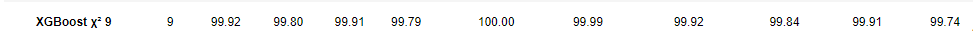

In [180]:
rank.keys()

Index(['Info. gain', 'Gain ratio', 'χ²', 'ReliefF'], dtype='object')

In [181]:
rank['χ²'].sort_values(ascending=False).head(9)

Feature
diff_srv_rate               86910.526779
dst_bytes                   85616.037503
serror_rate                 73702.596142
srv_serror_rate             71790.604057
dst_host_serror_rate        65551.502095
dst_host_srv_serror_rate    64069.774829
src_bytes                   63004.263295
dst_host_srv_count          49919.470868
dst_host_same_srv_rate      47408.315690
Name: χ², dtype: float64